### 4 - In a jupyter notebook, classification_exercises.ipynb, use a python module (pydata or seaborn datasets) containing datasets as a source from the iris data. Create a pandas dataframe, df_iris, from this data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# import splitting and imputing functions
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# turn off pink boxes for demo
import warnings
warnings.filterwarnings("ignore")

In [2]:
from pydataset import data
df =  data('iris')

#### 4 - a) Print the first 3 rows

In [3]:
df.head(3)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa


#### 4 - b) Print the number of rows and columns (shape)
 * The Iris dataset has 150 rows and 5 columns

In [4]:
df.shape

(150, 5)

#### 4 - c) Print the  column names
 * The Iris dataset has 150 rows and 5 columns

In [5]:
df.columns

Index(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width',
       'Species'],
      dtype='object')

#### 4 - d) Print the data type of each column

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [7]:
df.dtypes

Sepal.Length    float64
Sepal.Width     float64
Petal.Length    float64
Petal.Width     float64
Species          object
dtype: object

#### 4 - e) Print the summary statistics for each of the numeric variables


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Sepal.Length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
Sepal.Width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
Petal.Length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
Petal.Width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


### 5 Read the Table1_CustDetails table from the Excel_Exercises.xlsx file into a dataframe named df_excel

In [9]:
df_excel = pd.read_excel('Excel_Exercises.xlsx')
 
 

In [10]:
df_excel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7049 entries, 0 to 7048
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7049 non-null   object 
 1   gender             7049 non-null   object 
 2   is_senior_citizen  7049 non-null   int64  
 3   partner            7049 non-null   object 
 4   dependents         7049 non-null   object 
 5   phone_service      7049 non-null   int64  
 6   internet_service   7049 non-null   int64  
 7   contract_type      7049 non-null   int64  
 8   payment_type       7049 non-null   object 
 9   monthly_charges    7049 non-null   float64
 10  total_charges      7038 non-null   float64
 11  churn              7049 non-null   object 
 12  Unnamed: 12        0 non-null      float64
 13  Unnamed: 13        0 non-null      float64
dtypes: float64(4), int64(4), object(6)
memory usage: 771.1+ KB


##### 5 a) assign the first 100 rows to a new dataframe, df_excel_sample


In [11]:
df_excel.head(3)

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn,Unnamed: 12,Unnamed: 13
0,0002-ORFBO,Female,0,Yes,Yes,1,1,1,Mailed check,65.6,593.30,No,NaN,NaN
1,0003-MKNFE,Male,0,No,No,2,1,0,Mailed check,59.9,542.40,No,NaN,NaN
2,0004-TLHLJ,Male,0,No,No,1,2,0,Electronic check,73.9,280.85,Yes,NaN,NaN


In [12]:
df_excel_sample = df_excel.head(100)

##### 5 b) print the number of rows of your original dataframe


In [13]:
df_excel.shape[0]

7049

##### 5 c) print the first 5 column names


In [14]:
five_col = df_excel.columns[:5].to_list()

five_col

['customer_id', 'gender', 'is_senior_citizen', 'partner', 'dependents']

##### 5 d) print the column names that have a data type of object


In [15]:
type_object = df_excel.select_dtypes(include ='object').head()

In [16]:
type_object

,customer_id,gender,partner,dependents,payment_type,churn
0,0002-ORFBO,Female,Yes,Yes,Mailed check,No
1,0003-MKNFE,Male,No,No,Mailed check,No
2,0004-TLHLJ,Male,No,No,Electronic check,Yes
3,0011-IGKFF,Male,Yes,No,Electronic check,Yes
4,0013-EXCHZ,Female,Yes,No,Mailed check,Yes


##### 5 e) compute the range for each of the numeric variables.


In [17]:
variables_ranges = df_excel[['monthly_charges', 'total_charges']].describe().T
variables_ranges

,count,mean,std,min,25%,50%,75%,max
monthly_charges,7049.0,64.747014,30.099460,18.25,35.4500,70.35,89.850,118.75
total_charges,7038.0,2283.043883,2266.521984,18.80,401.5875,1397.10,3793.775,8684.80


In [18]:
# Meaningful variables to compute the ranges are monthly charges and total charges
variables_ranges['range'] = variables_ranges['max'] - variables_ranges['min']

variables_ranges

,count,mean,std,min,25%,50%,75%,max,range
monthly_charges,7049.0,64.747014,30.099460,18.25,35.4500,70.35,89.850,118.75,100.5
total_charges,7038.0,2283.043883,2266.521984,18.80,401.5875,1397.10,3793.775,8684.80,8666.0


### 6 Read the data from this google sheet into a dataframe, df_google

In [19]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357'    

csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')

df_googlesheet = pd.read_csv(csv_export_url)
# printng the first three rows
df_googlesheet.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


##### 6 b) print the number of rows and columns


In [20]:
df_googlesheet.shape

(891, 12)

##### 6 c) print the column names


In [21]:
df_googlesheet.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

##### 6 d) print the data type of each column


In [22]:
df_googlesheet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


##### 6 e) print the summary statistics for each of the numeric variables


In [23]:
df_googlesheet.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


##### 6 f) print the unique values for each of your categorical variables
 - Review

In [24]:
df_googlesheet.Survived.value_counts(dropna=False)

0    549
1    342
Name: Survived, dtype: int64

In [25]:
df_googlesheet.Pclass.value_counts(dropna=False)

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [26]:
df_googlesheet.Sex.value_counts(dropna=False)

male      577
female    314
Name: Sex, dtype: int64

In [27]:
df_googlesheet.Embarked.value_counts(dropna=False)

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

In [28]:
# I could get a count of unique values for each variable with an object data type.

for col in df_googlesheet.columns:
#     print(col)
    if df_googlesheet[col].dtypes == 'object':
        print(f'{col} has {df_googlesheet[col].nunique()} unique values.')


Name has 891 unique values.
Sex has 2 unique values.
Ticket has 681 unique values.
Cabin has 147 unique values.
Embarked has 3 unique values.


## Make a new python module, acquire.py to hold the following data aquisition functions:

### 1 - Make a function named get_titanic_data that returns the titanic data from the codeup data science database as a pandas data frame. Obtain your data from the Codeup Data Science Database.

In [29]:
import acquire

In [30]:
acquire.get_titanic_data().head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


### 2 -  Make a function named get_iris_data that returns the data from the iris_db on the codeup data science database as a pandas data frame. The returned data frame should include the actual name of the species in addition to the species_ids. Obtain your data from the Codeup Data Science Database.



In [31]:
acquire.get_iris_data().head()

,species_id,species_name,sepal_length,sepal_width,petal_length,petal_width
0,1,setosa,5.1,3.5,1.4,0.2
1,1,setosa,4.9,3.0,1.4,0.2
2,1,setosa,4.7,3.2,1.3,0.2
3,1,setosa,4.6,3.1,1.5,0.2
4,1,setosa,5.0,3.6,1.4,0.2


###  3 - Make a function named get_telco_data that returns the data from the telco_churn database in SQL. In your SQL, be sure to join all 4 tables together, so that the resulting dataframe contains all the contract, payment, and internet service options. Obtain your data from the Codeup Data Science Database.



In [32]:
acquire.get_telco_data().head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,3,0016-QLJIS,Female,0,Yes,Yes,65,Yes,...,Yes,Yes,Yes,Yes,90.45,5957.9,No,Two year,DSL,Mailed check
1,4,1,3,0017-DINOC,Male,0,No,No,54,No,...,Yes,Yes,No,No,45.20,2460.55,No,Two year,DSL,Credit card (automatic)
2,3,1,3,0019-GFNTW,Female,0,No,No,56,No,...,Yes,No,No,No,45.05,2560.1,No,Two year,DSL,Bank transfer (automatic)
3,4,1,3,0056-EPFBG,Male,0,Yes,Yes,20,No,...,Yes,No,No,Yes,39.40,825.4,No,Two year,DSL,Credit card (automatic)
4,3,1,3,0078-XZMHT,Male,0,Yes,No,72,Yes,...,Yes,Yes,Yes,Yes,85.15,6316.2,No,Two year,DSL,Bank transfer (automatic)


## Exercises

## Using the Iris Data:
##### 1 Use the function defined in acquire.py to load the iris data.



In [33]:
df_iris = acquire.get_iris_data()

In [34]:
df_iris.head()

,species_id,species_name,sepal_length,sepal_width,petal_length,petal_width
0,1,setosa,5.1,3.5,1.4,0.2
1,1,setosa,4.9,3.0,1.4,0.2
2,1,setosa,4.7,3.2,1.3,0.2
3,1,setosa,4.6,3.1,1.5,0.2
4,1,setosa,5.0,3.6,1.4,0.2


##### 2 Drop the species_id and measurement_id columns.

In [35]:
df_iris = df_iris.drop('species_id', axis =1)

In [36]:
df_iris.head()

,species_name,sepal_length,sepal_width,petal_length,petal_width
0,setosa,5.1,3.5,1.4,0.2
1,setosa,4.9,3.0,1.4,0.2
2,setosa,4.7,3.2,1.3,0.2
3,setosa,4.6,3.1,1.5,0.2
4,setosa,5.0,3.6,1.4,0.2


##### 3 Rename the species_name column to just species.


In [37]:
df_iris.rename(columns={'species_name':'species'}, inplace=True) 

In [38]:
df_iris.head()

,species,sepal_length,sepal_width,petal_length,petal_width
0,setosa,5.1,3.5,1.4,0.2
1,setosa,4.9,3.0,1.4,0.2
2,setosa,4.7,3.2,1.3,0.2
3,setosa,4.6,3.1,1.5,0.2
4,setosa,5.0,3.6,1.4,0.2


##### 4 Create dummy variables of the species name and concatenate onto the iris dataframe.



In [39]:
#dummy_df = pd.get_dummies(df_iris[['species']], dummy_na=False, drop_first=[True, True])
#dummy_df 

In [40]:
dummy_df = pd.get_dummies(df_iris.species)
dummy_df

,setosa,versicolor,virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,1,0,0


In [41]:
# Concatenate the dummy_df dataframe above with the original df and validate.
df_iris = pd.concat([df_iris, dummy_df], axis=1)
df_iris.head()

,species,sepal_length,sepal_width,petal_length,petal_width,setosa,versicolor,virginica
0,setosa,5.1,3.5,1.4,0.2,1,0,0
1,setosa,4.9,3.0,1.4,0.2,1,0,0
2,setosa,4.7,3.2,1.3,0.2,1,0,0
3,setosa,4.6,3.1,1.5,0.2,1,0,0
4,setosa,5.0,3.6,1.4,0.2,1,0,0


##### 5 Create a function named prep_iris that accepts the untransformed iris data, and returns the data with the transformations above applied.



In [42]:
def clean_iris(df):
    '''
    This function acquires the data from source, cleans the data, creates  dummy variables,
    and prepares the data for analysis
    '''
    
    df = df.drop('species_id', axis =1)
    df.rename(columns={'species_name':'species'}, inplace=True)
    #dummy_df = pd.get_dummies(df_iris[['species']], dummy_na=False, drop_first=[True, True])

    dummy_df = pd.get_dummies(df.species)
    df = pd.concat([df, dummy_df], axis=1)
    
    return df
    

In [43]:
df2 = acquire.get_iris_data()

In [44]:
df2 = clean_iris(df2)

 

In [45]:
df2.head()

,species,sepal_length,sepal_width,petal_length,petal_width,setosa,versicolor,virginica
0,setosa,5.1,3.5,1.4,0.2,1,0,0
1,setosa,4.9,3.0,1.4,0.2,1,0,0
2,setosa,4.7,3.2,1.3,0.2,1,0,0
3,setosa,4.6,3.1,1.5,0.2,1,0,0
4,setosa,5.0,3.6,1.4,0.2,1,0,0


In [46]:
df2.shape

(150, 8)

In [47]:
def split_iris_data(df):
    '''
    Takes in a dataframe and return train, validate, test subset dataframes
    '''
    train, test = train_test_split(df, test_size = .2, random_state=123, stratify=df.species)
    train, validate = train_test_split(train, test_size=.3, random_state=123, stratify=train.species)
    return train, validate, test

In [48]:
#train, test = train_test_split(df_iris2, test_size = .2, random_state=123, stratify=df_iris2.species)


In [49]:
#train, validate = train_test_split(train, test_size=.3, random_state=123, stratify=train.species)


In [50]:
#print(f'Train: {train.shape}')
#print(f'Validate: {validate.shape}')
#print(f'Test: {test.shape}')

In [51]:
def prep_iris(df):
    '''
        This function cleans the data and prepares the data for analysis and testing

    '''
    df = clean_iris(df)
    
    train, validate, test = split_iris_data(df)
     
    return train, validate, test

In [77]:
df3 = acquire.get_iris_data()

In [78]:
df3.head()

,species_id,species_name,sepal_length,sepal_width,petal_length,petal_width
0,1,setosa,5.1,3.5,1.4,0.2
1,1,setosa,4.9,3.0,1.4,0.2
2,1,setosa,4.7,3.2,1.3,0.2
3,1,setosa,4.6,3.1,1.5,0.2
4,1,setosa,5.0,3.6,1.4,0.2


In [89]:
train, validate, test = prep_iris(df3)

In [90]:
train.head()

,species,sepal_length,sepal_width,petal_length,petal_width,setosa,versicolor,virginica
79,versicolor,5.7,2.6,3.5,1.0,0,1,0
36,setosa,5.5,3.5,1.3,0.2,1,0,0
133,virginica,6.3,2.8,5.1,1.5,0,0,1
95,versicolor,5.7,3.0,4.2,1.2,0,1,0
18,setosa,5.7,3.8,1.7,0.3,1,0,0


(84, 8)

(36, 8)

(30, 8)

## Using the Titanic dataset

#### 1 Use the function defined in acquire.py to load the Titanic data.

In [55]:
df_titanic = acquire.get_titanic_data()
df_titanic.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


#### 2 Drop any unnecessary, unhelpful, or duplicated columns.



In [56]:
# shape of the data
df_titanic.shape

(891, 13)

In [57]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  891 non-null    int64  
 1   survived      891 non-null    int64  
 2   pclass        891 non-null    int64  
 3   sex           891 non-null    object 
 4   age           714 non-null    float64
 5   sibsp         891 non-null    int64  
 6   parch         891 non-null    int64  
 7   fare          891 non-null    float64
 8   embarked      889 non-null    object 
 9   class         891 non-null    object 
 10  deck          203 non-null    object 
 11  embark_town   889 non-null    object 
 12  alone         891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 97.5+ KB


In [58]:
# Drop duplicates...run just in case; reassign and check the shape of my data.

df_titanic = df_titanic.drop_duplicates()

In [59]:
#lets find missing values
missing = df_titanic.isnull().sum()
missing

passenger_id      0
survived          0
pclass            0
sex               0
age             177
sibsp             0
parch             0
fare              0
embarked          2
class             0
deck            688
embark_town       2
alone             0
dtype: int64

In [60]:
# Drop columns...run just in case; reassign and check the shape of my data.
cols_to_drop = ['deck', 'embarked', 'class', 'age']
df_titanic = df_titanic.drop(columns=cols_to_drop)
df_titanic.shape

(891, 9)

#### - 3 Encode the categorical columns. Create dummy variables of the categorical columns and concatenate them onto the dataframe

We could fill embark_town with most common value, 'Southampton', by hard-coding the value using the fillna() function, as below

In [61]:
# Run .fillna() on the entire df.
df_titanic['embark_town'] = df_titanic.embark_town.fillna(value='Southampton')

In [62]:
# Validate that missing values in embark_town have been handled.
df_titanic.embark_town.isna().sum()

0

Get dummy vars for sex and embark_town

dummy_na: create a dummy var for na values, also? drop_first: drop first dummy var (since we know if they do not belong to any of the vars listed, then they must belong to the first one that is not listed).

In [63]:
dummy_df = pd.get_dummies(df_titanic[['sex', 'embark_town']], dummy_na=False, drop_first=[True, True])
dummy_df

,sex_male,embark_town_Queenstown,embark_town_Southampton
0,1,0,1
1,0,0,0
2,0,0,1
3,0,0,1
4,1,0,1
...,...,...,...
886,1,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [64]:
# Concatenate the dummy_df dataframe above with the original df and validate.
df_titanic = pd.concat([df_titanic, dummy_df], axis=1)
df_titanic.head()

,passenger_id,survived,pclass,sex,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
0,0,0,3,male,1,0,7.2500,Southampton,0,1,0,1
1,1,1,1,female,1,0,71.2833,Cherbourg,0,0,0,0
2,2,1,3,female,0,0,7.9250,Southampton,1,0,0,1
3,3,1,1,female,1,0,53.1000,Southampton,0,0,0,1
4,4,0,3,male,0,0,8.0500,Southampton,1,1,0,1


#### 4 Create a function named prep_titanic that accepts the raw titanic data, and returns the data with the transformations above applied.



In [65]:
def clean_titanic(df):
    '''
    This function acquires the data from source, cleans the data, creates  dummy variables,
    and prepares the data for analysis
    '''
    
    #dropping unwanted columns 
    cols_to_drop = ['deck', 'embarked', 'class', 'age']
    df = df.drop(columns=cols_to_drop)
    # Run .fillna() on the entire df for embark_town with most common value, 'Southampton'.
    df['embark_town'] = df.embark_town.fillna(value='Southampton')
    #Get dummy vars for sex and embark_town
    dummy_df = pd.get_dummies(df[['sex', 'embark_town']], dummy_na=False, drop_first=[True, True])
    # Concatenate the dummy_df dataframe above with the original df and validate.
    df = pd.concat([df, dummy_df], axis=1)
    
    return df
    
    
    

In [66]:
#acquiring our data from the database or csv
df_titanic2 = acquire.get_titanic_data()

In [67]:
#let's test if our function works

df_titanic2 = clean_titanic(df_titanic2)


In [68]:
df_titanic2.head()

,passenger_id,survived,pclass,sex,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
0,0,0,3,male,1,0,7.2500,Southampton,0,1,0,1
1,1,1,1,female,1,0,71.2833,Cherbourg,0,0,0,0
2,2,1,3,female,0,0,7.9250,Southampton,1,0,0,1
3,3,1,1,female,1,0,53.1000,Southampton,0,0,0,1
4,4,0,3,male,0,0,8.0500,Southampton,1,1,0,1


In [69]:
def split_titanic(df):
    '''
    Takes in a dataframe and return train, validate, test subset dataframes
    '''
    train, test = train_test_split(df, test_size = .2, random_state=123, stratify=df.survived)
    train, validate = train_test_split(train, test_size=.3, random_state=123, stratify=train.survived)
    return train, validate, test


In [70]:
def prep_titanic(df):
    '''
        This function cleans the data and prepares the data for analysis and testing

    '''
    df = clean_titanic(df)
    train, validate, test = split_titanic(df)
    return train, validate, test 
    
    

In [71]:
df_titanic = acquire.get_titanic_data()

In [72]:
df_titanic.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [91]:
train, validate, test = prep_titanic(df_titanic)

In [92]:
train.head()

,passenger_id,survived,pclass,sex,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
583,583,0,1,male,0,0,40.1250,Cherbourg,1,1,0,0
165,165,1,3,male,0,2,20.5250,Southampton,0,1,0,1
50,50,0,3,male,4,1,39.6875,Southampton,0,1,0,1
259,259,1,2,female,0,1,26.0000,Southampton,0,0,0,1
306,306,1,1,female,0,0,110.8833,Cherbourg,1,0,0,0


## Using the Telco dataset



### 1 Use the function defined in acquire.py to load the Telco data.



In [74]:
df_telco = acquire.get_telco_data()

In [75]:
df_telco.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,3,0016-QLJIS,Female,0,Yes,Yes,65,Yes,...,Yes,Yes,Yes,Yes,90.45,5957.9,No,Two year,DSL,Mailed check
1,4,1,3,0017-DINOC,Male,0,No,No,54,No,...,Yes,Yes,No,No,45.20,2460.55,No,Two year,DSL,Credit card (automatic)
2,3,1,3,0019-GFNTW,Female,0,No,No,56,No,...,Yes,No,No,No,45.05,2560.1,No,Two year,DSL,Bank transfer (automatic)
3,4,1,3,0056-EPFBG,Male,0,Yes,Yes,20,No,...,Yes,No,No,Yes,39.40,825.4,No,Two year,DSL,Credit card (automatic)
4,3,1,3,0078-XZMHT,Male,0,Yes,No,72,Yes,...,Yes,Yes,Yes,Yes,85.15,6316.2,No,Two year,DSL,Bank transfer (automatic)


#### 2 Drop any unnecessary, unhelpful, or duplicated columns. This could mean dropping foreign key columns but keeping the corresponding string values, for example.



In [93]:
df_telco.drop(columns=['payment_type_id', 'internet_service_type_id', 'contract_type_id', 'customer_id'], inplace=True)

In [95]:
df_telco.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gender                 7043 non-null   object 
 1   senior_citizen         7043 non-null   int64  
 2   partner                7043 non-null   object 
 3   dependents             7043 non-null   object 
 4   tenure                 7043 non-null   int64  
 5   phone_service          7043 non-null   object 
 6   multiple_lines         7043 non-null   object 
 7   online_security        7043 non-null   object 
 8   online_backup          7043 non-null   object 
 9   device_protection      7043 non-null   object 
 10  tech_support           7043 non-null   object 
 11  streaming_tv           7043 non-null   object 
 12  streaming_movies       7043 non-null   object 
 13  paperless_billing      7043 non-null   object 
 14  monthly_charges        7043 non-null   float64
 15  tota

In [96]:
df_telco['total_charges'].value_counts()

          11
20.2      11
19.75      9
19.65      8
19.9       8
          ..
3365.4     1
3801.7     1
253.9      1
742.9      1
6273.4     1
Name: total_charges, Length: 6531, dtype: int64

In [97]:
df_telco[df_telco.total_charges == ' ']


,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
85,Female,0,Yes,Yes,0,No,No phone service,Yes,Yes,Yes,Yes,Yes,No,No,56.05,,No,Two year,DSL,Credit card (automatic)
156,Male,0,No,Yes,0,Yes,Yes,Yes,Yes,No,Yes,No,No,Yes,61.90,,No,Two year,DSL,Bank transfer (automatic)
236,Female,0,Yes,Yes,0,Yes,Yes,No,Yes,Yes,Yes,Yes,No,No,73.35,,No,Two year,DSL,Mailed check
255,Female,0,Yes,Yes,0,No,No phone service,Yes,No,Yes,Yes,Yes,No,Yes,52.55,,No,Two year,DSL,Bank transfer (automatic)
339,Female,0,Yes,Yes,0,Yes,No,Yes,Yes,Yes,No,Yes,Yes,No,80.85,,No,Two year,DSL,Mailed check
5681,Female,0,Yes,Yes,0,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,No,20.00,,No,Two year,None,Mailed check
5717,Male,0,No,Yes,0,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,No,20.25,,No,Two year,None,Mailed check
5727,Male,0,Yes,Yes,0,Yes,Yes,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,No,25.35,,No,Two year,None,Mailed check
5798,Male,0,Yes,Yes,0,Yes,Yes,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,No,25.75,,No,Two year,None,Mailed check
6007,Male,0,Yes,Yes,0,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,No,19.85,,No,Two year,None,Mailed check


In [98]:
df_telco[df_telco.tenure == 0]


,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
85,Female,0,Yes,Yes,0,No,No phone service,Yes,Yes,Yes,Yes,Yes,No,No,56.05,,No,Two year,DSL,Credit card (automatic)
156,Male,0,No,Yes,0,Yes,Yes,Yes,Yes,No,Yes,No,No,Yes,61.90,,No,Two year,DSL,Bank transfer (automatic)
236,Female,0,Yes,Yes,0,Yes,Yes,No,Yes,Yes,Yes,Yes,No,No,73.35,,No,Two year,DSL,Mailed check
255,Female,0,Yes,Yes,0,No,No phone service,Yes,No,Yes,Yes,Yes,No,Yes,52.55,,No,Two year,DSL,Bank transfer (automatic)
339,Female,0,Yes,Yes,0,Yes,No,Yes,Yes,Yes,No,Yes,Yes,No,80.85,,No,Two year,DSL,Mailed check
5681,Female,0,Yes,Yes,0,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,No,20.00,,No,Two year,None,Mailed check
5717,Male,0,No,Yes,0,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,No,20.25,,No,Two year,None,Mailed check
5727,Male,0,Yes,Yes,0,Yes,Yes,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,No,25.35,,No,Two year,None,Mailed check
5798,Male,0,Yes,Yes,0,Yes,Yes,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,No,25.75,,No,Two year,None,Mailed check
6007,Male,0,Yes,Yes,0,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,No,19.85,,No,Two year,None,Mailed check


It looks like customers with zero tenure have no total charges, and this is being represented by the whitespace character. Because the end goal of this preparation is to make the dataframe ready for a classification model with the target being churn, customers who have no possible way of churning should not be included in the model. We can drop these rows.

In [99]:
df_telco['total_charges'] = df_telco['total_charges'].str.strip()


In [100]:
df_telco = df_telco[df_telco.total_charges != '']


In [101]:
# Confirm that these rows were dropped
df_telco[df_telco.tenure == 0]

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type


In [102]:
# Convert datatype
df_telco['total_charges'] = df_telco.total_charges.astype(float)

In [103]:
# View numeric summary statistics
df_telco.describe()

,senior_citizen,tenure,monthly_charges,total_charges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


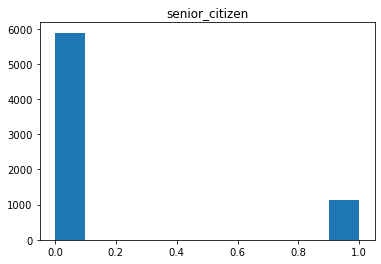

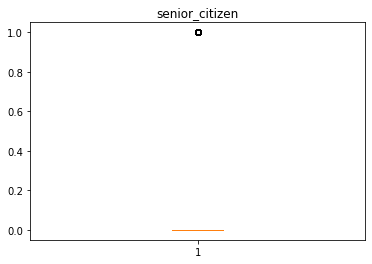

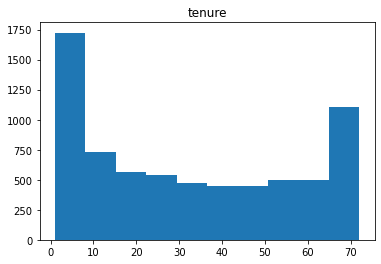

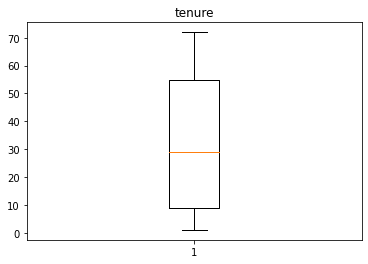

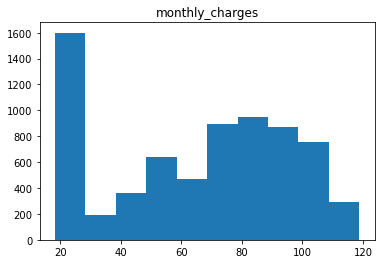

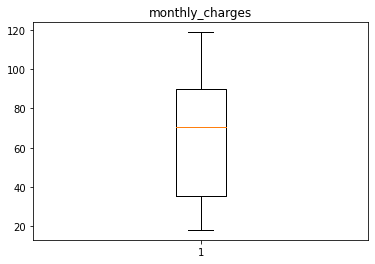

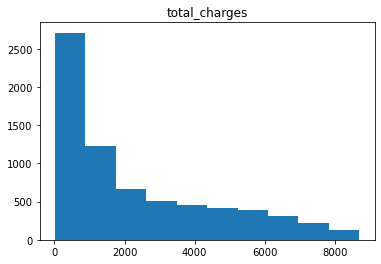

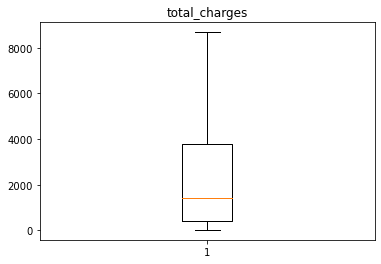

In [104]:
# Plot numeric columns
num_cols = df_telco.columns[[(df_telco[col].dtype == 'int64') or (df_telco[col].dtype == 'float64') for col in df_telco.columns]]
for col in num_cols:
    plt.hist(df_telco[col])
    plt.title(col)
    plt.show()
    plt.boxplot(df_telco[col])
    plt.title(col)
    plt.show()

In [105]:
# Use .describe with object columns
obj_cols = df_telco.columns[[df_telco[col].dtype == 'O' for col in df_telco.columns]]
obj_cols

Index(['gender', 'partner', 'dependents', 'phone_service', 'multiple_lines',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'paperless_billing', 'churn',
       'contract_type', 'internet_service_type', 'payment_type'],
      dtype='object')

In [106]:
for col in obj_cols:
    print(col.upper())
    print('Count:')
    print(df_telco[col].value_counts())
    print('\n')
    print('Proportions:')
    print(df_telco[col].value_counts(normalize=True, dropna=False))
    print('--------------------------')
    print('\n')

GENDER
Count:
Male      3549
Female    3483
Name: gender, dtype: int64


Proportions:
Male      0.504693
Female    0.495307
Name: gender, dtype: float64
--------------------------


PARTNER
Count:
No     3639
Yes    3393
Name: partner, dtype: int64


Proportions:
No     0.517491
Yes    0.482509
Name: partner, dtype: float64
--------------------------


DEPENDENTS
Count:
No     4933
Yes    2099
Name: dependents, dtype: int64


Proportions:
No     0.701507
Yes    0.298493
Name: dependents, dtype: float64
--------------------------


PHONE_SERVICE
Count:
Yes    6352
No      680
Name: phone_service, dtype: int64


Proportions:
Yes    0.903299
No     0.096701
Name: phone_service, dtype: float64
--------------------------


MULTIPLE_LINES
Count:
No                  3385
Yes                 2967
No phone service     680
Name: multiple_lines, dtype: int64


Proportions:
No                  0.481371
Yes                 0.421928
No phone service    0.096701
Name: multiple_lines, dtype: float64
-

#### 3 Encode the categorical columns. Create dummy variables of the categorical columns and concatenate them onto the dataframe.



Simple encoding for variables with only two possible values:

In [107]:
# encode binary categorical variables into numeric values
df_telco['gender_encoded'] = df_telco.gender.map({'Female': 1, 'Male': 0})
df_telco['partner_encoded'] = df_telco.partner.map({'Yes': 1, 'No': 0})
df_telco['dependents_encoded'] = df_telco.dependents.map({'Yes': 1, 'No': 0})
df_telco['phone_service_encoded'] = df_telco.phone_service.map({'Yes': 1, 'No': 0})
df_telco['paperless_billing_encoded'] = df_telco.paperless_billing.map({'Yes': 1, 'No': 0})
df_telco['churn_encoded'] = df_telco.churn.map({'Yes': 1, 'No': 0})

Using get_dummies



In [109]:
dummy_df = pd.get_dummies(df_telco[['multiple_lines', \
                              'online_security', \
                              'online_backup', \
                              'device_protection', \
                              'tech_support', \
                              'streaming_tv', \
                              'streaming_movies', \
                              'contract_type', \
                              'internet_service_type', \
                              'payment_type']], dummy_na=False, \
                              drop_first=True)
dummy_df

,multiple_lines_No phone service,multiple_lines_Yes,online_security_No internet service,online_security_Yes,online_backup_No internet service,online_backup_Yes,device_protection_No internet service,device_protection_Yes,tech_support_No internet service,tech_support_Yes,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,0,1,0,1,0,1,0,1,0,1,...,1,0,1,0,1,0,0,0,0,1
1,1,0,0,1,0,0,0,0,0,1,...,1,0,0,0,1,0,0,1,0,0
2,1,0,0,1,0,1,0,1,0,1,...,0,0,0,0,1,0,0,0,0,0
3,1,0,0,1,0,0,0,1,0,1,...,0,0,0,0,1,0,0,1,0,0
4,0,1,0,0,0,1,0,1,0,1,...,1,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,0,1,0,1,0,1,0,...,0,1,0,0,0,0,1,0,0,1
7039,0,0,1,0,1,0,1,0,1,0,...,0,1,0,0,0,0,1,0,0,1
7040,0,0,1,0,1,0,1,0,1,0,...,0,1,0,0,0,0,1,1,0,0
7041,0,0,1,0,1,0,1,0,1,0,...,0,1,0,0,0,0,1,0,0,1


In [110]:
df_telco = pd.concat([df_telco, dummy_df], axis=1)
df_telco.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,Female,0,Yes,Yes,65,Yes,Yes,Yes,Yes,Yes,...,1,0,1,0,1,0,0,0,0,1
1,Male,0,No,No,54,No,No phone service,Yes,No,No,...,1,0,0,0,1,0,0,1,0,0
2,Female,0,No,No,56,No,No phone service,Yes,Yes,Yes,...,0,0,0,0,1,0,0,0,0,0
3,Male,0,Yes,Yes,20,No,No phone service,Yes,No,Yes,...,0,0,0,0,1,0,0,1,0,0
4,Male,0,Yes,No,72,Yes,Yes,No,Yes,Yes,...,1,0,1,0,1,0,0,0,0,0


New features: Most of these are garbage and have multiple issues with keeping them - think critically about whether any of these should be used (do they actually supply new information not already represented by the existing fields?) and if they need to be one-hot encoded if kept.

In [ ]:
####

In [111]:
#splitting the data
train_validate, test = train_test_split(df_telco, test_size=.2, 
                                        random_state=123, 
                                        stratify=df_telco.churn)

train, validate = train_test_split(train_validate, test_size=.3, 
                                   random_state=123, 
                                   stratify=train_validate.churn)

In [112]:
train.shape


(3937, 47)

In [113]:
validate.shape


(1688, 47)

In [114]:
test.shape


(1407, 47)

### Turning into Functions

In [115]:
def split_telco_data(df):
    '''
    This function performs split on telco data, stratify churn.
    Returns train, validate, and test dfs.
    '''
    train_validate, test = train_test_split(df, test_size=.2, 
                                        random_state=123, 
                                        stratify=df.churn)
    train, validate = train_test_split(train_validate, test_size=.2, 
                                   random_state=123, 
                                   stratify=train_validate.churn)
    return train, validate, test

In [116]:
def prep_telco_data(df):
    # Drop duplicate columns
    df.drop(columns=['payment_type_id', 'internet_service_type_id', 'contract_type_id', 'customer_id'], inplace=True)
       
    # Drop null values stored as whitespace    
    df['total_charges'] = df['total_charges'].str.strip()
    df = df[df.total_charges != '']
    
    # Convert to correct datatype
    df['total_charges'] = df.total_charges.astype(float)
    
    # Convert binary categorical variables to numeric
    df['gender_encoded'] = df.gender.map({'Female': 1, 'Male': 0})
    df['partner_encoded'] = df.partner.map({'Yes': 1, 'No': 0})
    df['dependents_encoded'] = df.dependents.map({'Yes': 1, 'No': 0})
    df['phone_service_encoded'] = df.phone_service.map({'Yes': 1, 'No': 0})
    df['paperless_billing_encoded'] = df.paperless_billing.map({'Yes': 1, 'No': 0})
    df['churn_encoded'] = df.churn.map({'Yes': 1, 'No': 0})
    
    # Get dummies for non-binary categorical variables
    dummy_df = pd.get_dummies(df[['multiple_lines', \
                              'online_security', \
                              'online_backup', \
                              'device_protection', \
                              'tech_support', \
                              'streaming_tv', \
                              'streaming_movies', \
                              'contract_type', \
                              'internet_service_type', \
                              'payment_type']], dummy_na=False, \
                              drop_first=True)
    
    # Concatenate dummy dataframe to original 
    df = pd.concat([df, dummy_df], axis=1)
    
    # split the data
    train, validate, test = split_telco_data(df)
    
    return train, validate, test